<a href="https://colab.research.google.com/github/componavt/python-ai-template/blob/main/notebooks/week3_visualization_level_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Week 3: Visualization — Визаулизация

## 📥 [0] Подготовка данных: клонирование репозитория и загрузка CSV

**Что делаем:**
- Клонируем GitHub-репозиторий курса в Google Colab
- Загружаем CSV-файл `cartoons_genre_country_duration.csv` (8011 записей о 2273 фильмах)
- Очищаем столбцы: удаляем URL Wikidata, переименовываем `*Label` → короткие имена
- Приводим числовые поля (`capital_cost`, `duration`) к типу `int`

**Результат:** Чистая таблица `df` с полями:
- `film` — название мультфильма
- `genre` — жанр
- `country` — страна производства
- `duration` — продолжительность (минуты)
- `capital_cost` — бюджет ($)

In [1]:
# 📥 [0] Клонирование репозитория и загрузка данных

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Шаг 1: Клонируем репозиторий
if not os.path.exists("python-ai-template"):
    !git clone -q https://github.com/componavt/python-ai-template.git

%cd python-ai-template
print("✅ Репозиторий готов\n")

# Шаг 2: Загружаем CSV-файл
df = pd.read_csv("data/examples/cartoons_genre_country_duration.csv")
print(f"📊 Загружено строк: {len(df)}")

# Шаг 3: Очистка данных
# Удаляем URL Wikidata (столбец 'film')
df = df.drop(columns=["film"])

# Переименовываем столбцы с Label → короткие имена
df = df.rename(columns={
    "filmLabel": "film",
    "genreLabel": "genre",
    "countryLabel": "country",
})

# Приводим числовые столбцы к int (заменяем пропуски на 0)
df["duration"] = pd.to_numeric(df["duration"], errors="coerce").fillna(0).astype(int)
df["capital_cost"] = pd.to_numeric(df["capital_cost"], errors="coerce").fillna(0).astype(int)

print("✅ Данные очищены и готовы к анализу\n")

# Краткий обзор
print("📋 Структура данных:")
print(f"  Столбцы: {', '.join(df.columns)}")
print(f"  Уникальных фильмов: {df['film'].nunique()}")
print(f"  Уникальных стран: {df['country'].nunique()}")
print(f"  Уникальных жанров: {df['genre'].nunique()}")
print(f"\n🔍 Первые 3 строки:\n{df.head(3)}")

/content/python-ai-template
✅ Репозиторий готов

📊 Загружено строк: 2596
✅ Данные очищены и готовы к анализу

📋 Структура данных:
  Столбцы: film, genre, country, duration, capital_cost
  Уникальных фильмов: 418
  Уникальных стран: 40
  Уникальных жанров: 125

🔍 Первые 3 строки:
                        film                                   genre  \
0                Мэри и Макс                       взрослая анимация   
1  Отважный маленький тостер  экранизация литературного произведения   
2                  Ренессанс                               киберпанк   

      country  duration  capital_cost  
0   Австралия        90       8240000  
1         США        90       2300000  
2  Люксембург       101      18000000  


## 📊 [1] Bar Chart: Top 10 Countries by Production Volume

**Что показывает:**  
Какие страны лидируют в производстве мультфильмов. США доминируют (~35% всех фильмов), за ними Франция, СССР, Дания и Россия.

**Когда использовать:**  
Для сравнения категорий (стран, компаний, продуктов) по одному числовому показателю.

**Библиотеки:** `matplotlib`

**Метод pandas:** `value_counts()` — подсчитывает, сколько раз каждое значение встречается в столбце.

/tmp/ipython-input-488871758.py:23: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


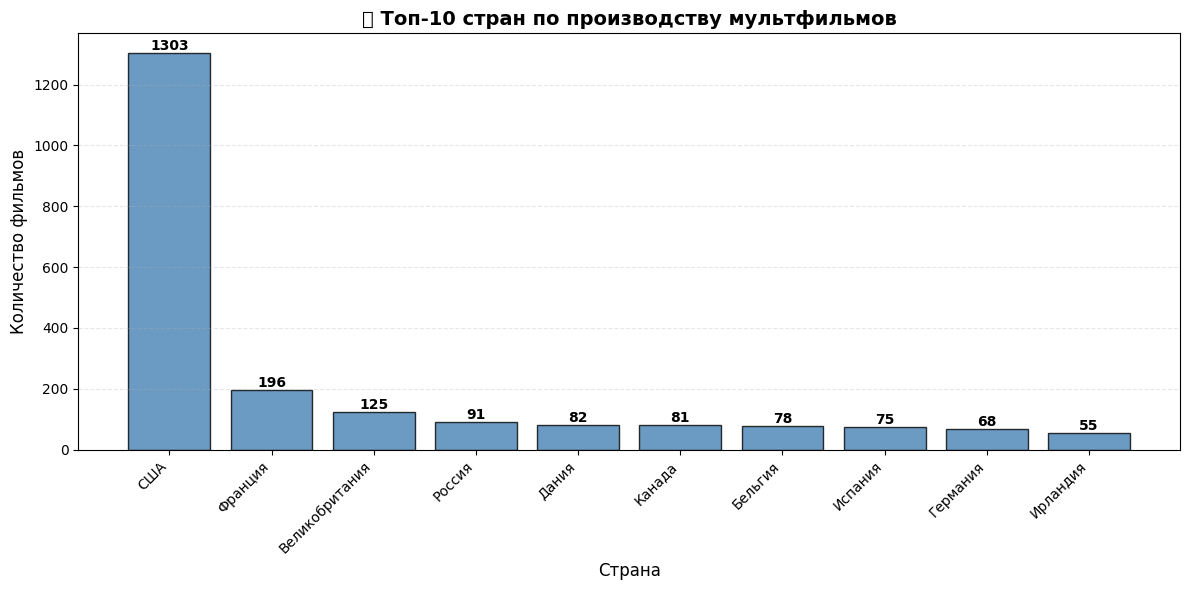

💡 Инсайт: США производят 50.2% всех мультфильмов в датасете!
   Топ-3: США, Франция, Великобритания


In [2]:
# 📊 [1] Bar Chart: Top 10 Countries

# 1. Подготовка данных: считаем количество фильмов по странам
top_countries = df['country'].value_counts().head(10)

# 2. Создаём график
plt.figure(figsize=(12, 6))
bars = plt.bar(top_countries.index, top_countries.values, color='steelblue', edgecolor='black', alpha=0.8)

# 3. Добавляем значения над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# 4. Оформление
plt.title('🌍 Топ-10 стран по производству мультфильмов', fontsize=14, fontweight='bold')
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Количество фильмов', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# 5. Инсайт
usa_share = (top_countries['США'] / len(df) * 100)
print(f"💡 Инсайт: США производят {usa_share:.1f}% всех мультфильмов в датасете!")
print(f"   Топ-3: {', '.join(top_countries.head(3).index)}")

## 📊 [2] Horizontal Bar Chart: Top 15 Genres

**Что показывает:**  
Самые популярные жанры в мультипликации. Лидируют приключенческие, комедийные и фэнтезийные фильмы.

**Когда использовать:**  
Когда у категорий длинные названия — горизонтальный график читается лучше, чем вертикальный с повёрнутыми подписями.

**Библиотеки:** `matplotlib`

**Метод:** `plt.barh()` — horizontal bar chart (горизонтальная столбчатая диаграмма).

/tmp/ipython-input-761658779.py:20: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


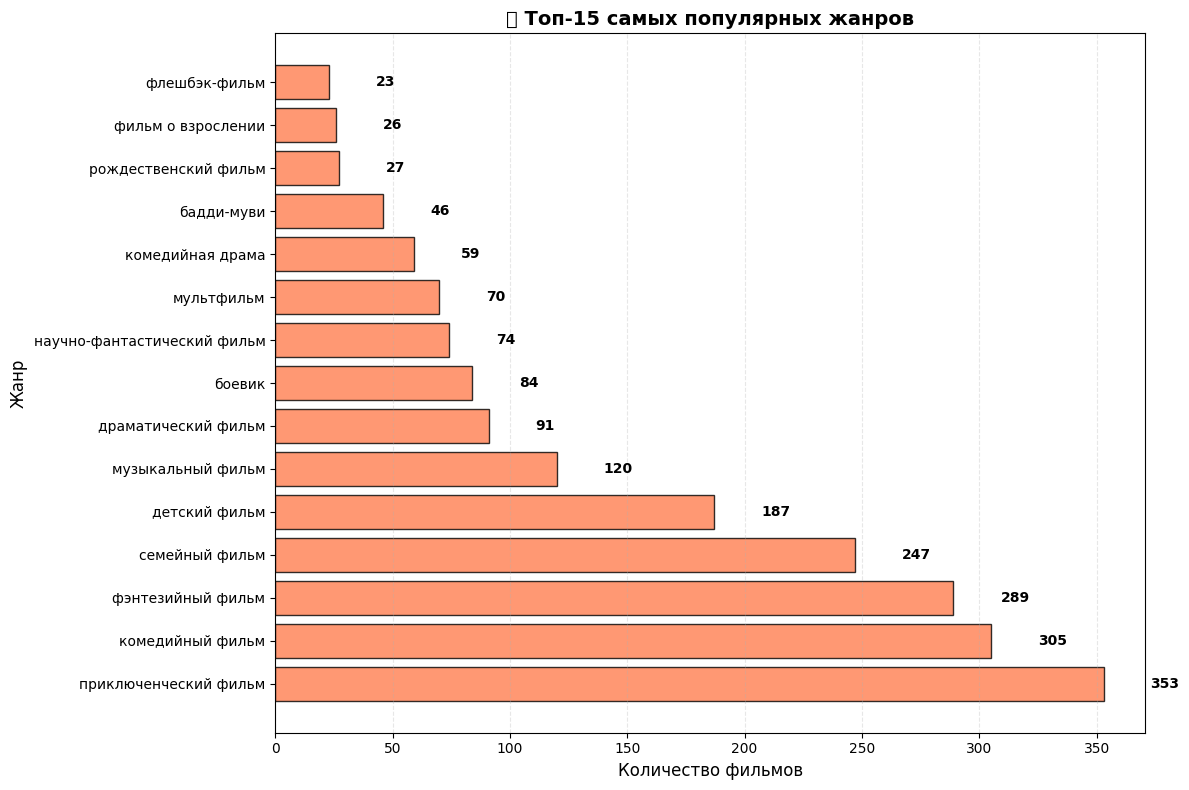

💡 Инсайт: Приключенческие фильмы (353) встречаются в 15.3 раз чаще, чем флешбэк-фильм (23)


In [3]:
# 📊 [2] Horizontal Bar Chart: Top 15 Genres

# 1. Подготовка данных
top_genres = df['genre'].value_counts().head(15)

# 2. Создаём график
plt.figure(figsize=(12, 8))
bars = plt.barh(top_genres.index, top_genres.values, color='coral', edgecolor='black', alpha=0.8)

# 3. Добавляем значения справа от столбцов
for i, (genre, count) in enumerate(top_genres.items()):
    plt.text(count + 20, i, f'{count}',
             va='center', fontsize=10, fontweight='bold')

# 4. Оформление
plt.title('🎬 Топ-15 самых популярных жанров', fontsize=14, fontweight='bold')
plt.xlabel('Количество фильмов', fontsize=12)
plt.ylabel('Жанр', fontsize=12)
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# 5. Инсайт
print(f"💡 Инсайт: Приключенческие фильмы ({top_genres.iloc[0]}) встречаются в {top_genres.iloc[0]/top_genres.iloc[-1]:.1f} раз чаще, чем {top_genres.index[-1]} ({top_genres.iloc[-1]})")

## 📊 [3] Pie Chart: Top 5 Countries Market Share

**Что показывает:**  
Долю топ-5 стран в мировом производстве мультфильмов. Наглядно видно доминирование США.

**Когда использовать:**  
Для визуализации долей от целого (но не более 5-7 категорий, иначе неудобно читать).

**Библиотеки:** `matplotlib`

**Совет:** Используйте `startangle=90` для красивого расположения первого сектора сверху.

/tmp/ipython-input-3452320558.py:30: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


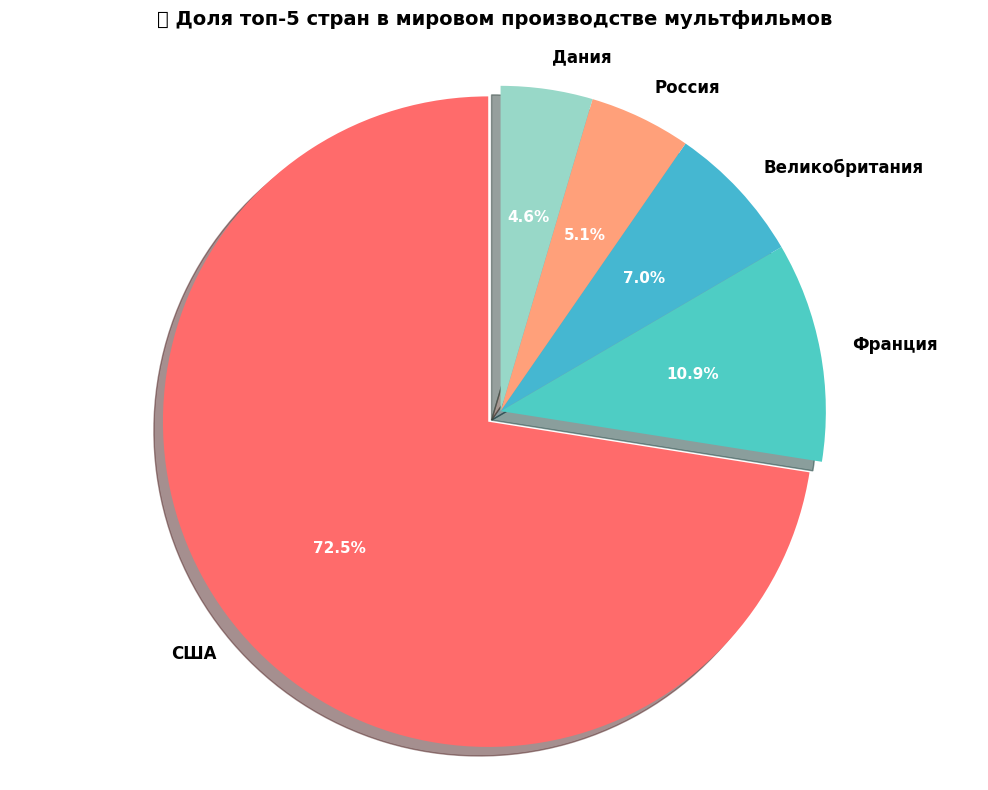

💡 Инсайт: США — 50.2%, остальные 81 страна — всего 30.8%


In [4]:
# 📊 [3] Pie Chart: Top 5 Countries Market Share

# 1. Подготовка данных
top5_countries = df['country'].value_counts().head(5)

# 2. Создаём график
plt.figure(figsize=(10, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
wedges, texts, autotexts = plt.pie(
    top5_countries.values,
    labels=top5_countries.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=(0.05, 0, 0, 0, 0),  # "выдвигаем" самый большой сектор
    shadow=True,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

# 3. Делаем проценты жирными и белыми
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

# 4. Оформление
plt.title('🥧 Доля топ-5 стран в мировом производстве мультфильмов',
          fontsize=14, fontweight='bold', pad=20)
plt.axis('equal')  # Круг, а не овал
plt.tight_layout()
plt.show()

# 5. Инсайт
usa_pct = top5_countries['США'] / len(df) * 100
others_pct = (len(df) - top5_countries.sum()) / len(df) * 100
print(f"💡 Инсайт: США — {usa_pct:.1f}%, остальные 81 страна — всего {others_pct:.1f}%")

## 📊 [4] Histogram: Budget Distribution

**Что показывает:**  
Распределение бюджетов мультфильмов. Большинство фильмов имеют бюджет до $100 млн, но есть выбросы (до $2.8 млрд!).

**Когда использовать:**  
Для анализа распределения одной числовой переменной (бюджет, возраст, зарплата).

**Библиотеки:** `matplotlib`

**Параметр bins:** Количество "корзин" для группировки значений (30 bins = 30 столбцов).

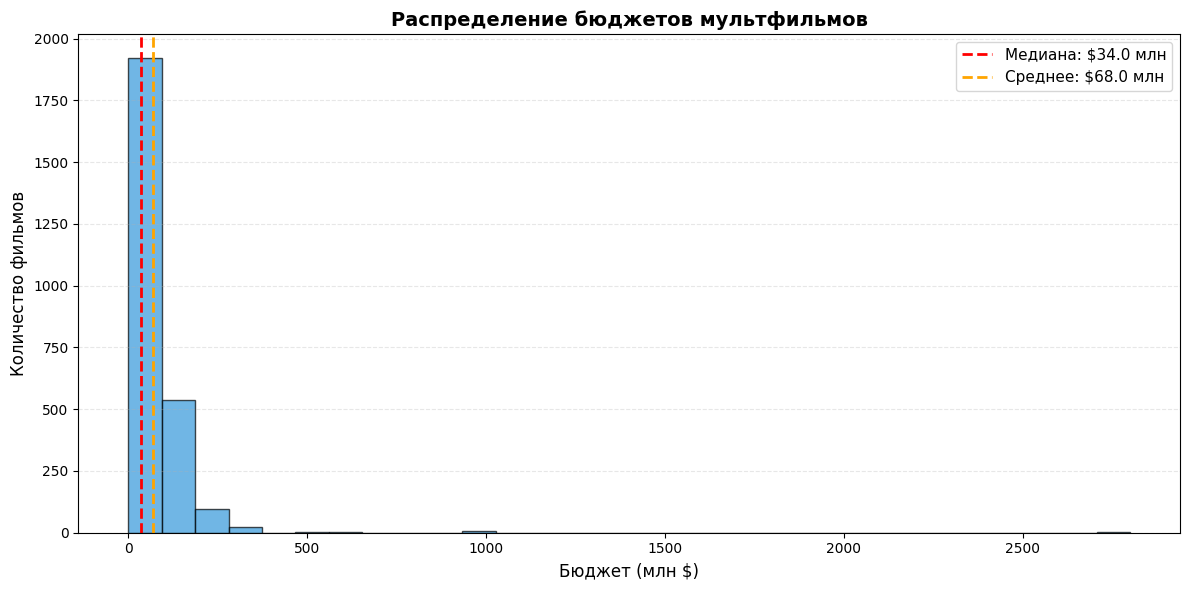

💡 Инсайт: 50% фильмов имеют бюджет до $34.0 млн (медиана)
   Самый дорогой: $2800 млн
   Фильмов с бюджетом >$100 млн: 526


In [6]:
# 📊 [4] Histogram: Budget Distribution

# 1. Подготовка данных: фильтруем нулевые бюджеты и переводим в млн $
df_with_budget = df[df['capital_cost'] > 0].copy()
budgets_millions = df_with_budget['capital_cost'] / 1e6

# 2. Создаём график
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(
    budgets_millions,
    bins=30,
    color='#3498db',
    edgecolor='black',
    alpha=0.7
)

# 3. Добавляем вертикальные линии для медианы и среднего
median_budget = budgets_millions.median()
mean_budget = budgets_millions.mean()

plt.axvline(median_budget, color='red', linestyle='--', linewidth=2,
            label=f'Медиана: ${median_budget:.1f} млн')
plt.axvline(mean_budget, color='orange', linestyle='--', linewidth=2,
            label=f'Среднее: ${mean_budget:.1f} млн')

# 4. Оформление
plt.title('Распределение бюджетов мультфильмов', fontsize=14, fontweight='bold')
plt.xlabel('Бюджет (млн $)', fontsize=12)
plt.ylabel('Количество фильмов', fontsize=12)
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# 5. Инсайт
print(f"💡 Инсайт: 50% фильмов имеют бюджет до ${median_budget:.1f} млн (медиана)")
print(f"   Самый дорогой: ${budgets_millions.max():.0f} млн")
print(f"   Фильмов с бюджетом >$100 млн: {(budgets_millions > 100).sum()}")

## 📊 [5] Histogram: Duration Distribution

**Что показывает:**  
Распределение продолжительности мультфильмов. Пик приходится на 80-90 минут — стандарт полнометражного фильма.

**Когда использовать:**  
Для визуализации распределения времени, возраста, расстояний и других непрерывных величин.

**Библиотеки:** `matplotlib`

**Совет:** Используйте вертикальную линию (`axvline`) для обозначения важных значений (например, 90 минут = стандарт).

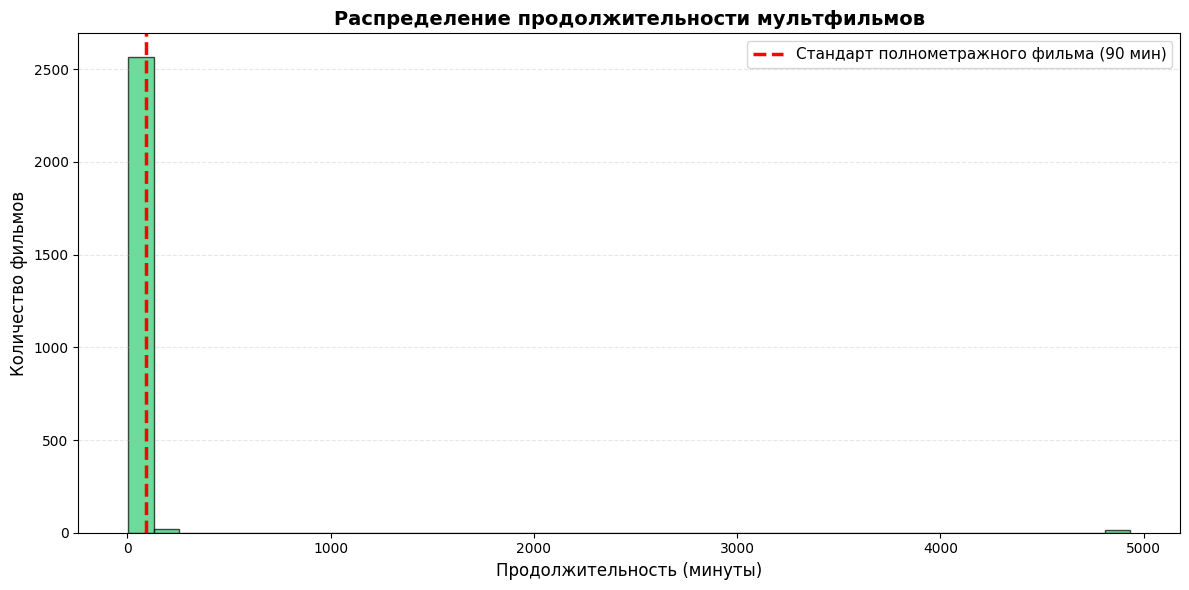

💡 Инсайт: Медианная продолжительность — 88 минут
   Полнометражных фильмов (≥75 мин): 2406 (92.7%)
   Короткометражных (<45 мин): 8 (0.3%)


In [8]:
# 📊 [5] Histogram: Duration Distribution

# 1. Подготовка данных: фильтруем нулевые значения
df_with_duration = df[df['duration'] > 0].copy()

# 2. Создаём график
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(
    df_with_duration['duration'],
    bins=40,
    color='#2ecc71',
    edgecolor='black',
    alpha=0.7
)

# 3. Добавляем вертикальную линию на 90 минут (стандарт полнометражки)
plt.axvline(90, color='red', linestyle='--', linewidth=2.5,
            label='Стандарт полнометражного фильма (90 мин)')

# 4. Оформление
plt.title('Распределение продолжительности мультфильмов', fontsize=14, fontweight='bold')
plt.xlabel('Продолжительность (минуты)', fontsize=12)
plt.ylabel('Количество фильмов', fontsize=12)
plt.legend(fontsize=11, loc='upper right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# 5. Инсайт
median_duration = df_with_duration['duration'].median()
feature_films = (df_with_duration['duration'] >= 75).sum()
short_films = (df_with_duration['duration'] < 45).sum()

print(f"💡 Инсайт: Медианная продолжительность — {median_duration:.0f} минут")
print(f"   Полнометражных фильмов (≥75 мин): {feature_films} ({feature_films/len(df_with_duration)*100:.1f}%)")
print(f"   Короткометражных (<45 мин): {short_films} ({short_films/len(df_with_duration)*100:.1f}%)")